Query: select * from bigquery-public-data.covid19_jhu_csse.summary where date BETWEEN DATE('2021-01-01') AND DATE('2021-01-31') and country_region = 'US' 

Query yang digunakan di pilih dikarenakan ingin melihat jumlah jiwa yang terdampak covid19 di negara Amerika Serikat pada awal tahun 2021 tepatnya selama bulan Januari. Adapun detail data yang ingin diketahui adalah negara bagian mana yang mempunyai jumlah korban terbanyak dan terendah dari covid19 dengan detail yang ingin dilihat adalah jumlah korban jiwa yang terjangkit covid19 selama bulan Januari, jumlah korban jiwa yang meninggal karena covid19 selama bulan Januari, jumlah jiwa yang sembuh karena covid19 selama bulan Januari dan jumlah korban jiwa yang masih terjangkit covid19 selama bulan Januari di negara bagian Amerika Serikat

## i.Perkenalan

Nama: Satriya Fauzan Adhim

Batch: 019

## ii. Import Libraries

### Libraries yang digunakan ada dua yaitu pandas dan matplot

In [1]:
## Import

import pandas as pd
import matplotlib.pyplot as plt

## iii. Data Loading

Berikut data loading beserta url dari data yang digunakan

In [2]:
##Load Data

df = pd.read_csv('https://raw.githubusercontent.com/kodokgodog/Latihan_hactiv8/main/h8dsft_P0GC1_Satriya-Fauzan-Adhim.csv')

In [3]:
df

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Alabama,US,2021-01-07,32.539527,-86.644082,POINT(-86.64408227 32.53952745),4705,50,0,4655,1001.0,Autauga,"Autauga, Alabama, US"
1,Alabama,US,2021-01-07,30.727750,-87.722071,POINT(-87.72207058 30.72774991),14845,171,0,14674,1003.0,Baldwin,"Baldwin, Alabama, US"
2,Alabama,US,2021-01-07,31.868263,-85.387129,POINT(-85.3871286 31.868263),1614,35,0,1579,1005.0,Barbour,"Barbour, Alabama, US"
3,Alabama,US,2021-01-07,32.996421,-87.125115,POINT(-87.1251146 32.99642064),1981,48,0,1933,1007.0,Bibb,"Bibb, Alabama, US"
4,Alabama,US,2021-01-07,33.982109,-86.567906,POINT(-86.56790593 33.98210918),4957,72,0,4885,1009.0,Blount,"Blount, Alabama, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101506,Wyoming,US,2021-01-11,43.935225,-110.589080,POINT(-110.5890801 43.93522482),2447,4,0,2443,56039.0,Teton,"Teton, Wyoming, US"
101507,Wyoming,US,2021-01-11,41.287818,-110.547578,POINT(-110.5475782 41.2878183),1744,8,0,1736,56041.0,Uinta,"Uinta, Wyoming, US"
101508,Wyoming,US,2021-01-11,NaN,NaN,NaN,0,0,0,0,90056.0,Unassigned,"Unassigned, Wyoming, US"
101509,Wyoming,US,2021-01-11,43.904516,-107.680187,POINT(-107.680187 43.90451606),817,21,0,796,56043.0,Washakie,"Washakie, Wyoming, US"


In [4]:
df.head()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Alabama,US,2021-01-07,32.539527,-86.644082,POINT(-86.64408227 32.53952745),4705,50,0,4655,1001.0,Autauga,"Autauga, Alabama, US"
1,Alabama,US,2021-01-07,30.727750,-87.722071,POINT(-87.72207058 30.72774991),14845,171,0,14674,1003.0,Baldwin,"Baldwin, Alabama, US"
2,Alabama,US,2021-01-07,31.868263,-85.387129,POINT(-85.3871286 31.868263),1614,35,0,1579,1005.0,Barbour,"Barbour, Alabama, US"
3,Alabama,US,2021-01-07,32.996421,-87.125115,POINT(-87.1251146 32.99642064),1981,48,0,1933,1007.0,Bibb,"Bibb, Alabama, US"
4,Alabama,US,2021-01-07,33.982109,-86.567906,POINT(-86.56790593 33.98210918),4957,72,0,4885,1009.0,Blount,"Blount, Alabama, US"


Tabel di atas menunjukkan lima data teratas dalam data yang digunakan

In [5]:
df.tail()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
101506,Wyoming,US,2021-01-11,43.935225,-110.589080,POINT(-110.5890801 43.93522482),2447,4,0,2443,56039.0,Teton,"Teton, Wyoming, US"
101507,Wyoming,US,2021-01-11,41.287818,-110.547578,POINT(-110.5475782 41.2878183),1744,8,0,1736,56041.0,Uinta,"Uinta, Wyoming, US"
101508,Wyoming,US,2021-01-11,NaN,NaN,NaN,0,0,0,0,90056.0,Unassigned,"Unassigned, Wyoming, US"
101509,Wyoming,US,2021-01-11,43.904516,-107.680187,POINT(-107.680187 43.90451606),817,21,0,796,56043.0,Washakie,"Washakie, Wyoming, US"
101510,Wyoming,US,2021-01-11,43.839612,-104.567488,POINT(-104.5674881 43.83961191),485,4,0,481,56045.0,Weston,"Weston, Wyoming, US"


Tabel di atas menunjukkan lima data terbawah dalam data yang digunakan

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101511 entries, 0 to 101510
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   province_state  101511 non-null  object 
 1   country_region  101511 non-null  object 
 2   date            101511 non-null  object 
 3   latitude        99355 non-null   float64
 4   longitude       99355 non-null   float64
 5   location_geom   99355 non-null   object 
 6   confirmed       101511 non-null  int64  
 7   deaths          101511 non-null  int64  
 8   recovered       101511 non-null  int64  
 9   active          101511 non-null  int64  
 10  fips            101170 non-null  float64
 11  admin2          101325 non-null  object 
 12  combined_key    101511 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 10.1+ MB


Berdasarkan statistik sederhana dari data diatas, dapat di lihat bahwa tipe data yang terdapat dalam data tersebut adalah object, integer dan float. Kolom yang memiliki tipe data object berjumlah 6 kolom, kolom yang memiliki tipe data object adalah kolom province_state, country_region, date, admin2 dan combined_key. Terdapat 4 kolom pada data tersebut yang memiliki tipe data integer, kolom tersebut adalah kolom confirmed, deaths, recovered dan active. Sedangkan kolom yang memiliki tipe data float berjumlah 3 kolom, kolom tersebut adalah kolom latitude, longitude dan fips.

In [7]:
df.describe()

,latitude,longitude,confirmed,deaths,recovered,active,fips
count,99355.000000,99355.000000,1.015110e+05,101511.000000,101511.0,1.015110e+05,101170.000000
mean,37.936303,-91.379001,7.173237e+03,120.315621,0.0,7.052194e+03,32413.274568
std,6.127389,14.529963,2.696988e+04,470.841812,0.0,2.655091e+04,18013.553929
min,13.444300,-174.159600,0.000000e+00,0.000000,0.0,-3.760000e+02,66.000000
25%,34.317093,-97.891788,7.240000e+02,10.000000,0.0,7.100000e+02,19051.000000
50%,38.185745,-89.915561,1.799000e+03,30.000000,0.0,1.765000e+03,30069.000000
75%,41.707594,-82.948853,4.698000e+03,74.000000,0.0,4.623000e+03,47041.000000
max,69.314792,145.673900,1.116948e+06,16770.000000,0.0,1.100178e+06,99999.000000


Dari data statistik di atas, dapat kita ketahui beberapa kolom yang merupakan .......

##iv. Data Cleaning

In [8]:
df

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Alabama,US,2021-01-07,32.539527,-86.644082,POINT(-86.64408227 32.53952745),4705,50,0,4655,1001.0,Autauga,"Autauga, Alabama, US"
1,Alabama,US,2021-01-07,30.727750,-87.722071,POINT(-87.72207058 30.72774991),14845,171,0,14674,1003.0,Baldwin,"Baldwin, Alabama, US"
2,Alabama,US,2021-01-07,31.868263,-85.387129,POINT(-85.3871286 31.868263),1614,35,0,1579,1005.0,Barbour,"Barbour, Alabama, US"
3,Alabama,US,2021-01-07,32.996421,-87.125115,POINT(-87.1251146 32.99642064),1981,48,0,1933,1007.0,Bibb,"Bibb, Alabama, US"
4,Alabama,US,2021-01-07,33.982109,-86.567906,POINT(-86.56790593 33.98210918),4957,72,0,4885,1009.0,Blount,"Blount, Alabama, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101506,Wyoming,US,2021-01-11,43.935225,-110.589080,POINT(-110.5890801 43.93522482),2447,4,0,2443,56039.0,Teton,"Teton, Wyoming, US"
101507,Wyoming,US,2021-01-11,41.287818,-110.547578,POINT(-110.5475782 41.2878183),1744,8,0,1736,56041.0,Uinta,"Uinta, Wyoming, US"
101508,Wyoming,US,2021-01-11,NaN,NaN,NaN,0,0,0,0,90056.0,Unassigned,"Unassigned, Wyoming, US"
101509,Wyoming,US,2021-01-11,43.904516,-107.680187,POINT(-107.680187 43.90451606),817,21,0,796,56043.0,Washakie,"Washakie, Wyoming, US"


Dibawah ini merupakan pembuatan copy dari dataframe, sehingga apabila terjadi kesalahan, dataframe utama tidak berubah dan akan memudahkan pengerjaan.

In [9]:
covid_19 = df.copy()

In [10]:
covid_19

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Alabama,US,2021-01-07,32.539527,-86.644082,POINT(-86.64408227 32.53952745),4705,50,0,4655,1001.0,Autauga,"Autauga, Alabama, US"
1,Alabama,US,2021-01-07,30.727750,-87.722071,POINT(-87.72207058 30.72774991),14845,171,0,14674,1003.0,Baldwin,"Baldwin, Alabama, US"
2,Alabama,US,2021-01-07,31.868263,-85.387129,POINT(-85.3871286 31.868263),1614,35,0,1579,1005.0,Barbour,"Barbour, Alabama, US"
3,Alabama,US,2021-01-07,32.996421,-87.125115,POINT(-87.1251146 32.99642064),1981,48,0,1933,1007.0,Bibb,"Bibb, Alabama, US"
4,Alabama,US,2021-01-07,33.982109,-86.567906,POINT(-86.56790593 33.98210918),4957,72,0,4885,1009.0,Blount,"Blount, Alabama, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101506,Wyoming,US,2021-01-11,43.935225,-110.589080,POINT(-110.5890801 43.93522482),2447,4,0,2443,56039.0,Teton,"Teton, Wyoming, US"
101507,Wyoming,US,2021-01-11,41.287818,-110.547578,POINT(-110.5475782 41.2878183),1744,8,0,1736,56041.0,Uinta,"Uinta, Wyoming, US"
101508,Wyoming,US,2021-01-11,NaN,NaN,NaN,0,0,0,0,90056.0,Unassigned,"Unassigned, Wyoming, US"
101509,Wyoming,US,2021-01-11,43.904516,-107.680187,POINT(-107.680187 43.90451606),817,21,0,796,56043.0,Washakie,"Washakie, Wyoming, US"


### Missing Values

In [11]:
df.isnull().sum()

province_state       0
country_region       0
date                 0
latitude          2156
longitude         2156
location_geom     2156
confirmed            0
deaths               0
recovered            0
active               0
fips               341
admin2             186
combined_key         0
dtype: int64

Berdasarkan data di atas, dapat dilihat jumlah missing value yang terdapat pada kolom latitude, longitude, location_geo, fips dan admin2.

Dikarenakan kolom yang memiliki missing values tidak digunakan dan tidak relevan terhadap analisis yang akan di kerjakan, maka dirasa tidak diperlukan pengisian missing values pada kolom-kolom tersebut, dan kolom tersebut dapat dihilangkan untuk memudahkan dalam analisis yang akan dilakukan. Adapun proses penghilangan kolom-kolom tersebut dapat dilihat dibawah ini.

In [12]:
kolom_kasus = covid_19.drop(columns=['latitude','country_region','longitude','location_geom','fips','admin2','combined_key'])
kolom_kasus

,province_state,date,confirmed,deaths,recovered,active
0,Alabama,2021-01-07,4705,50,0,4655
1,Alabama,2021-01-07,14845,171,0,14674
2,Alabama,2021-01-07,1614,35,0,1579
3,Alabama,2021-01-07,1981,48,0,1933
4,Alabama,2021-01-07,4957,72,0,4885
...,...,...,...,...,...,...
101506,Wyoming,2021-01-11,2447,4,0,2443
101507,Wyoming,2021-01-11,1744,8,0,1736
101508,Wyoming,2021-01-11,0,0,0,0
101509,Wyoming,2021-01-11,817,21,0,796


Tabel di atas merupakan tabel yang telah di hilangkan kolom-kolom yang tidak menunjang di dalam analisis.

Proses dibawah ini merupakan proses untuk mengelompokkan province_state yang sama di dalam tabel.

In [13]:
kolom_kasus.groupby("province_state").agg(pd.Series.tolist)

,date,confirmed,deaths,recovered,active
province_state,,,,,
Alabama,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[4705, 14845, 1614, 1981, 4957, 927, 1598, 102...","[50, 171, 35, 48, 72, 22, 46, 158, 63, 25, 54,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4655, 14674, 1579, 1933, 4885, 905, 1552, 101..."
Alaska,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[39, 218, 23728, 2744, 0, 159, 60, 129, 5217, ...","[0, 0, 126, 12, 0, 0, 0, 1, 20, 0, 5, 19, 1, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[39, 218, 23602, 2732, 0, 159, 60, 128, 5197, ..."
Arizona,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[8045, 8502, 12095, 4867, 3601, 441, 1719, 360...","[255, 158, 226, 151, 55, 4, 38, 5575, 378, 368...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7790, 8344, 11869, 4716, 3546, 437, 1681, 355..."
Arkansas,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[1420, 1355, 2292, 19981, 2762, 1040, 257, 222...","[33, 21, 74, 286, 70, 17, 1, 31, 32, 24, 35, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1387, 1334, 2218, 19695, 2692, 1023, 256, 219..."
California,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[57081, 71, 2761, 8217, 1321, 1529, 44967, 799...","[713, 0, 26, 102, 22, 9, 371, 2, 33, 711, 16, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[56368, 71, 2735, 8115, 1299, 1520, 44596, 797..."
Colorado,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[41979, 987, 40172, 517, 201, 1194, 15443, 297...","[534, 24, 574, 0, 1, 16, 179, 68, 21, 5, 2, 3,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[41445, 963, 39598, 517, 200, 1178, 15264, 291..."
Connecticut,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[60396, 51050, 8117, 7341, 51566, 12164, 5365,...","[1772, 1917, 235, 270, 1615, 275, 114, 1, 88, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[58624, 49133, 7882, 7071, 49951, 11889, 5251,..."
Delaware,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[10097, 36188, 16515, 149, 10680, 38033, 17579...","[171, 474, 304, 0, 182, 493, 316, 0, 177, 480,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[9926, 35714, 16211, 149, 10498, 37540, 17263,..."
Diamond Princess,"[2021-01-07, 2021-01-12, 2021-01-09, 2021-01-2...","[49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 4..."


Setelah dilakukan pengelompokkan sesuai dengan nama negara bagian (province_state), didapati ada baris yang bernama "Recovered" yang bukan merupakan nama dari negara bagian Amerika Serikat, sehingga diputuskan untuk menghilangkan baris tersebut.

Berikut adalah proses dalam menghilangkan baris "Recovered" dari data.

In [14]:
kolom_kasus_1 = kolom_kasus.drop(df[df['province_state'] == 'Recovered'].index)

In [15]:
kolom_kasus_1.groupby("province_state").agg(pd.Series.tolist)

,date,confirmed,deaths,recovered,active
province_state,,,,,
Alabama,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[4705, 14845, 1614, 1981, 4957, 927, 1598, 102...","[50, 171, 35, 48, 72, 22, 46, 158, 63, 25, 54,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4655, 14674, 1579, 1933, 4885, 905, 1552, 101..."
Alaska,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[39, 218, 23728, 2744, 0, 159, 60, 129, 5217, ...","[0, 0, 126, 12, 0, 0, 0, 1, 20, 0, 5, 19, 1, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[39, 218, 23602, 2732, 0, 159, 60, 128, 5197, ..."
Arizona,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[8045, 8502, 12095, 4867, 3601, 441, 1719, 360...","[255, 158, 226, 151, 55, 4, 38, 5575, 378, 368...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7790, 8344, 11869, 4716, 3546, 437, 1681, 355..."
Arkansas,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[1420, 1355, 2292, 19981, 2762, 1040, 257, 222...","[33, 21, 74, 286, 70, 17, 1, 31, 32, 24, 35, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1387, 1334, 2218, 19695, 2692, 1023, 256, 219..."
California,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[57081, 71, 2761, 8217, 1321, 1529, 44967, 799...","[713, 0, 26, 102, 22, 9, 371, 2, 33, 711, 16, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[56368, 71, 2735, 8115, 1299, 1520, 44596, 797..."
Colorado,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[41979, 987, 40172, 517, 201, 1194, 15443, 297...","[534, 24, 574, 0, 1, 16, 179, 68, 21, 5, 2, 3,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[41445, 963, 39598, 517, 200, 1178, 15264, 291..."
Connecticut,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[60396, 51050, 8117, 7341, 51566, 12164, 5365,...","[1772, 1917, 235, 270, 1615, 275, 114, 1, 88, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[58624, 49133, 7882, 7071, 49951, 11889, 5251,..."
Delaware,"[2021-01-07, 2021-01-07, 2021-01-07, 2021-01-0...","[10097, 36188, 16515, 149, 10680, 38033, 17579...","[171, 474, 304, 0, 182, 493, 316, 0, 177, 480,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[9926, 35714, 16211, 149, 10498, 37540, 17263,..."
Diamond Princess,"[2021-01-07, 2021-01-12, 2021-01-09, 2021-01-2...","[49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 4..."


###Penggantian nama kolom menjadi nama lain untuk memudahkan pemahaman tabel dan data.

Untuk kolom yang akan diganti namanya serta nama baru pada kolom tersebut terlampir di dalam proses di bawah ini, yang kemudian ditampilkan lima data teratas dalam tabel sehingga mudah untuk melihat apakan nama kolom sudah terganti apa belum.

In [16]:
kolom_kasus_2 = kolom_kasus_1.rename(
    columns = {'province_state': 'state','confirmed': 'terkena','deaths': 'meninggal','recovered': 'sembuh','active': 'masih_sakit'}
)

kolom_kasus_2.head()

,state,date,terkena,meninggal,sembuh,masih_sakit
0,Alabama,2021-01-07,4705,50,0,4655
1,Alabama,2021-01-07,14845,171,0,14674
2,Alabama,2021-01-07,1614,35,0,1579
3,Alabama,2021-01-07,1981,48,0,1933
4,Alabama,2021-01-07,4957,72,0,4885


##v. Explorasi Data

###Pengelompokkan data tabel

Pengelompokkan data tabel dilakukan untuk menganalisis sehingga bisa didapatkan jumlah dari data yang ingin didapat berdasarkan setiap negara bagian.

Proses dibawah ini merupakan proses pengelompokkan dari negara bagian dengan nilai kolom terkena, yang kemudian kolom terkena tersebut ditotalkan sehingga bisa mendapatkan jumlah total dari kolom terkena di setiap negara bagian.

In [17]:
kolom_kasus_2.groupby("state", sort=False)["terkena"].sum()

state
Alabama                     12918813
Alaska                       1591437
Arizona                     20393424
Arkansas                     8247175
California                  89981909
Colorado                    11481062
Connecticut                  6900960
Delaware                     2135494
Diamond Princess                1519
District of Columbia         1030286
Florida                     47886722
Georgia                     24831364
Grand Princess                  3193
Guam                          231484
Hawaii                        751494
Idaho                        4763931
Illinois                    32760433
Indiana                     17994078
Iowa                         9401451
Kansas                       7931105
Kentucky                     9924537
Louisiana                   11214867
Maine                        1009208
Maryland                     9934465
Massachusetts               14211219
Michigan                    17902298
Minnesota                   1372

In [18]:
jumlah_terkena = kolom_kasus_2.groupby("state", sort=False)["terkena"].sum()

terkena_tertinggi = jumlah_terkena.max()
state_tertinggi = jumlah_terkena.idxmax()

print(f"State dengan terkena tertinggi adalah {state_tertinggi} dengan total terkena sebanyak {terkena_tertinggi} kasus")

State dengan terkena tertinggi adalah California dengan total terkena sebanyak 89981909 kasus


In [19]:
jumlah_terkena = kolom_kasus_2.groupby("state", sort=False)["terkena"].sum()

terkena_terendah = jumlah_terkena.min()
state_terendah = jumlah_terkena.idxmin()

print(f"State dengan terkena terendah adalah {state_terendah} dengan total terkena terendah {terkena_terendah} kasus")

State dengan terkena terendah adalah Diamond Princess dengan total terkena terendah 1519 kasus


Berdasarkan hasil proses di atas, kita bisa mendapatkan hasil bahwa California adalah negara bagian dengan jumlah total terkena dan Diamond Princess merupakan negara bagian dengan jumlah total terkena paling sedikit.

Proses dibawah ini merupakan proses pengelompokkan dari negara bagian dengan nilai kolom meninggal, yang kemudian kolom meninggal tersebut ditotalkan sehingga bisa mendapatkan jumlah total dari kolom meninggal di setiap negara bagian dan dapat ditarik jumlah korban jiwa yang meninggal pada setiap negara bagian.

In [20]:
kolom_kasus_2.groupby("state", sort=False)["meninggal"].sum()

state
Alabama                      186775
Alaska                         7342
Arizona                      342158
Arkansas                     132941
California                  1030161
Colorado                     164572
Connecticut                  204066
Delaware                      31172
Diamond Princess                  0
District of Columbia          26230
Florida                      743830
Georgia                      381979
Grand Princess                   93
Guam                           3897
Hawaii                        10234
Idaho                         49438
Illinois                     614988
Indiana                      287274
Iowa                         133127
Kansas                       104462
Kentucky                      97311
Louisiana                    253071
Maine                         14853
Maryland                     202544
Massachusetts                419885
Michigan                     449699
Minnesota                    182964
Mississippi           

In [21]:
jumlah_meninggal = kolom_kasus_2.groupby("state", sort=False)["meninggal"].sum()

meninggal_tertinggi = jumlah_meninggal.max()
state_tertinggi = jumlah_meninggal.idxmax()

print(f"State dengan meninggal tertinggi adalah {state_tertinggi} dengan total meninggal dunia sebanyak {meninggal_tertinggi} jiwa")

State dengan meninggal tertinggi adalah New York dengan total meninggal dunia sebanyak 1265480 jiwa


In [22]:
jumlah_meninggal = kolom_kasus_2.groupby("state", sort=False)["terkena"].sum()

meninggal_terendah = jumlah_meninggal.min()
state_terendah = jumlah_meninggal.idxmin()

print(f"State dengan meninggal terendah adalah {state_terendah} dengan total terkena meninggal dunia sebanya {meninggal_terendah} jiwa")

State dengan meninggal terendah adalah Diamond Princess dengan total terkena meninggal dunia sebanya 1519 jiwa


Berdasarkan hasil proses di atas, kita bisa mendapatkan hasil bahwa New York adalah negara bagian dengan jumlah total terkena dan Diamond Princess merupakan negara bagian dengan jumlah total terkena paling sedikit.

Proses dibawah ini merupakan proses pengelompokkan dari negara bagian dengan nilai kolom sembuh, yang kemudian kolom sembuh tersebut ditotalkan sehingga bisa mendapatkan jumlah total dari kolom sembuh di setiap negara bagian dan dapat ditarik jumlah jiwa yang sembuh dari covid19 pada setiap negara bagian.

In [23]:
kolom_kasus_2.groupby("state", sort=False)["sembuh"].sum()

state
Alabama                     0
Alaska                      0
Arizona                     0
Arkansas                    0
California                  0
Colorado                    0
Connecticut                 0
Delaware                    0
Diamond Princess            0
District of Columbia        0
Florida                     0
Georgia                     0
Grand Princess              0
Guam                        0
Hawaii                      0
Idaho                       0
Illinois                    0
Indiana                     0
Iowa                        0
Kansas                      0
Kentucky                    0
Louisiana                   0
Maine                       0
Maryland                    0
Massachusetts               0
Michigan                    0
Minnesota                   0
Mississippi                 0
Missouri                    0
Montana                     0
Nebraska                    0
Nevada                      0
New Hampshire               0
New 

Berdasarkan data di atas dapat langsung disimpulkan bahwa tidak ada sama sekali penyintas Covid19 yang sembuh di bulan Januari sehingga dirasa tidak diperlukan adanya proses lanjutan dari data tersebut.

Proses dibawah ini merupakan proses pengelompokkan dari negara bagian dengan nilai kolom masih_sakit, yang kemudian kolom masih_sakit tersebut ditotalkan sehingga bisa mendapatkan jumlah total dari kolom masih_sakit di setiap negara bagian dan dapat ditarik jumlah korban jiwa yang masih_sakit pada setiap negara bagian di bulan Januari 2021.

In [24]:
kolom_kasus_2.groupby("state", sort=False)["masih_sakit"].sum()

state
Alabama                     12732038
Alaska                       1584095
Arizona                     20051266
Arkansas                     8114234
California                  88946152
Colorado                    11316490
Connecticut                  6696894
Delaware                     2104322
Diamond Princess                1519
District of Columbia         1004056
Florida                     47142892
Georgia                     24449238
Grand Princess                  3100
Guam                          227587
Hawaii                        741260
Idaho                        4714493
Illinois                    32145445
Indiana                     17706804
Iowa                         9268436
Kansas                       7825228
Kentucky                     9827226
Louisiana                   10961796
Maine                         994355
Maryland                     9731921
Massachusetts               13787150
Michigan                    17451070
Minnesota                   1354

In [25]:
jumlah_masih_sakit = kolom_kasus_2.groupby("state", sort=False)["meninggal"].sum()

masih_sakit_tertinggi = jumlah_masih_sakit.max()
state_tertinggi = jumlah_masih_sakit.idxmax()

print(f"State dengan jumlah orang yang masih sakit tertinggi adalah {state_tertinggi} dengan total sebanyak {masih_sakit_tertinggi} jiwa")

State dengan jumlah orang yang masih sakit tertinggi adalah New York dengan total sebanyak 1265480 jiwa


In [26]:
jumlah_masih_sakit = kolom_kasus_2.groupby("state", sort=False)["terkena"].sum()

masih_sakit_terendah = jumlah_masih_sakit.min()
state_terendah = jumlah_masih_sakit.idxmin()

print(f"State dengan jumlah orang yang masih sakit tertinggi adalah {state_terendah} dengan total sebanyak {masih_sakit_terendah} jiwa")

State dengan jumlah orang yang masih sakit tertinggi adalah Diamond Princess dengan total sebanyak 1519 jiwa


Berdasarkan hasil proses di atas, kita bisa mendapatkan hasil bahwa New York adalah negara bagian dengan jumlah total jiwa yang masih menjadi penyintas covid19 terbanyak di bulan Januari dan Diamond Princess merupakan negara bagian dengan jumlah total jiwa yang paling sedikit masih menjadi penyintas covid19  di bulan Januari.

###Visualisasi dari data yang telah didapatkan


Berikut merupakan visualisasi dari data yang telah dikelompokkan berdasarkan tabel kolom terkena, dan ditampilkan yang memiliki 10 nilai tertinggi sehingga keterangan dari visualisasi masih dapat dilihat dengan jelas.

<Axes: xlabel='state'>

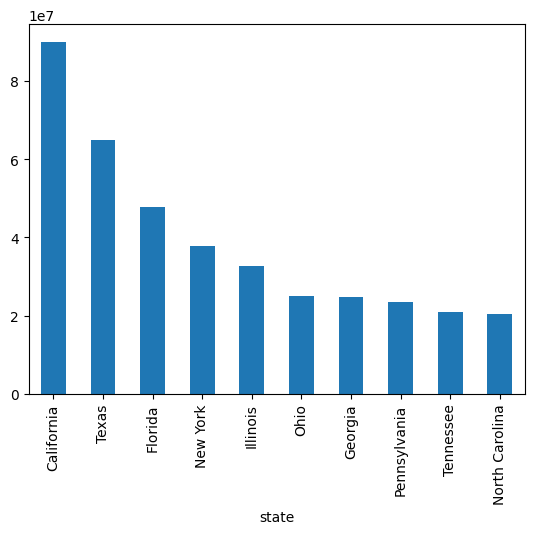

In [27]:
terbesar_terkena = kolom_kasus_2.groupby("state", sort=False)["terkena"].sum().nlargest(10)
terbesar_terkena.plot(kind='bar')

Diagram di atas merupakan penggambaran dari total jumlah terkena terbanyak di negara bagian Amerika Serikat. Dalam diagram tersebut ditampilkan 10 negara dengan jumlah jiwa terkena terbanyak, sehingga dapat lebih mudah di lihat proporsinya. Adapun negara dengan jumlah jiwa yang terkena terbanyak adalah negara bagian California.

Berikut merupakan visualisasi dari data yang telah dikelompokkan berdasarkan  kolom meninggal, dan ditampilkan yang memiliki 10 nilai tertinggi sehingga keterangan dari visualisasi masih dapat dilihat dengan jelas.

<Axes: xlabel='state'>

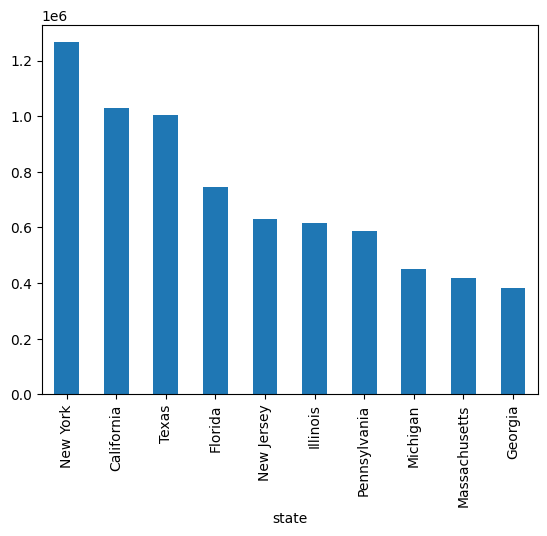

In [28]:
terbesar_meninggal = kolom_kasus_2.groupby("state", sort=False)["meninggal"].sum().nlargest(10)
terbesar_meninggal.plot(kind='bar')

Diagram di atas merupakan penggambaran dari total jumlah meninggal terbanyak di negara bagian Amerika Serikat. Dalam diagram tersebut ditampilkan 10 negara dengan jumlah meninggal terbanyak, sehingga dapat lebih mudah di lihat proporsinya. Negara bagian New York merupakan negara bagian dengan jumlah korban jiwa meninggal terbanyak.

Berikut merupakan visualisasi dari data yang telah dikelompokkan berdasarkan  kolom masih_sakit, dan ditampilkan yang memiliki 10 nilai tertinggi sehingga keterangan dari visualisasi masih dapat dilihat dengan jelas.

<Axes: xlabel='state'>

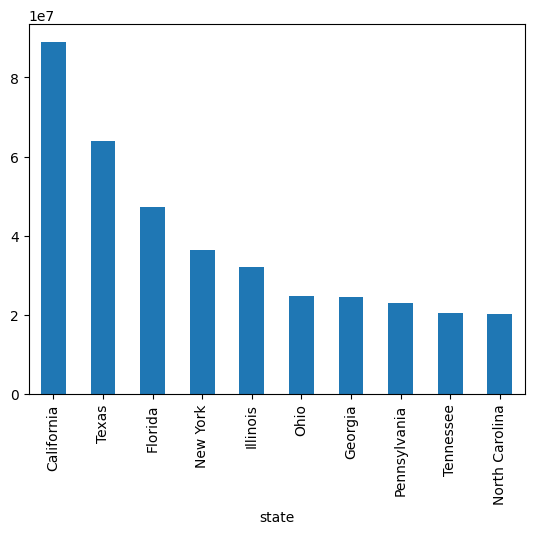

In [29]:
terbesar_masih_sakit = kolom_kasus_2.groupby("state", sort=False)["masih_sakit"].sum().nlargest(10)
terbesar_masih_sakit.plot(kind='bar')

Diagram di atas merupakan penggambaran dari total jumlah jiwa yang masih sakit terbanyak di negara bagian Amerika Serikat. Dalam diagram tersebut ditampilkan 10 negara dengan jumlah jiwa yang masih sakit terbanyak, sehingga dapat lebih mudah di lihat proporsinya. Negara bagian California merupakan negara bagian dengan jumlah jiwa yang masih sakit terbanyak di bulan Januari 2021.

##vi. Kesimpulan

  Berdasarkan analisis di atas dan tujuan dari dibuatnya analisis tersebut, maka dapat terjawab pertanyaan mengenai negara bagian mana yang mempunyai jumlah korban terbanyak dan terendah dari covid19 dengan detail yang ingin dilihat adalah jumlah korban jiwa yang terjangkit covid19 selama bulan Januari, jumlah korban jiwa yang meninggal karena covid19 selama bulan Januari, jumlah jiwa yang sembuh karena covid19 selama bulan Januari dan jumlah korban jiwa yang masih terjangkit covid19 selama bulan Januari di negara bagian Amerika Serikat



Hal yang dapat disimpulkan dari analisis data di atas adalah California adalah negara bagian dengan jumlah total terkena di Januari 2021 dan Diamond Princess merupakan negara bagian dengan jumlah total terkena paling sedikit. New York adalah negara bagian dengan jumlah total terkena dan Diamond Princess merupakan negara bagian dengan jumlah total terkena paling sedikit. Tidak didapati adanya penyintas covid19 yang sembuh di bulan Januari 2021. New York adalah negara bagian dengan jumlah total jiwa yang masih menjadi penyintas covid19 terbanyak di bulan Januari 2021 dan Diamond Princess merupakan negara bagian dengan jumlah total jiwa yang paling sedikit masih menjadi penyintas covid19 di bulan Januari 2021.